In [ ]:
!kaggle competitions download -c titanic
!kaggle datasets download -d catmanjr/cifar-10-train-valid-test

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Dataset URL: https://www.kaggle.com/datasets/catmanjr/cifar-10-train-valid-test
License(s): MIT
100% 956M/957M [00:52<00:00, 22.4MB/s]
100% 957M/957M [00:52<00:00, 19.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import keras
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.applications as applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Sequential, load_model
from tensorflow.keras.models import Model
import tensorflow.keras.callbacks as callbacks
import tensorflow.keras.utils as utils
from tensorflow.keras.applications import DenseNet121, ResNet152V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input

In [ ]:
zip_path = 'cifar-10-train-valid-test.zip'
!unzip -q {zip_path}
zip_path = '/content'

In [ ]:
train_dir = '/content/train_valid_test/train_valid_test/train'
valid_dir = '/content/train_valid_test/train_valid_test/valid'


In [31]:
image_size = [64,64]
batch_size = 32

In [32]:
base_model = applications.DenseNet121(input_shape=(64,64,3), weights='imagenet', include_top=False)

In [33]:
# base_model.trainable = False

In [34]:
for layers in base_model.layers:
  layers.trainable = False

In [35]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,

)
valid_ds = keras.utils.image_dataset_from_directory(
    directory=valid_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
)

Found 45000 files belonging to 10 classes.
Found 5000 files belonging to 10 classes.


In [36]:
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

In [37]:
train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)


In [38]:
inputs = Input(shape=(64, 64, 3))

# Pass the inputs through the base model
x = base_model(inputs, training=False)

# Add global average pooling
x = GlobalAveragePooling2D()(x)

# Add a dense layer
x = Dense(1024, activation='relu')(x)

# Add the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 2, 2, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,097,354 (30.89 MB)

 Trainable params: 1,059,850 (4.04 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [78]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.8693 - loss: 0.3697 - val_accuracy: 0.6882 - val_loss: 1.1211
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8945 - loss: 0.2968 - val_accuracy: 0.6896 - val_loss: 1.2162
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.9122 - loss: 0.2469 - val_accuracy: 0.6926 - val_loss: 1.3290
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9261 - loss: 0.2074 - val_accuracy: 0.6964 - val_loss: 1.4750
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.9322 - loss: 0.1889 - val_accuracy: 0.6898 - val_loss: 1.6282
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9452 - loss: 0.1559 - val_accuracy: 0.6870 - val_loss: 1.6997
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.9488 - loss: 0.1466 - val_accuracy: 0.6980 - val_loss: 1.7174
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9535 -

In [79]:
model.save('model.h5')

In [80]:
loss, accuracy = model.evaluate(valid_ds)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6865 - loss: 2.0629
Validation Loss: 2.0109
Validation Accuracy: 0.6994


In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

img_path = '/content/train_valid_test/train_valid_test/train/ship/14582.png'
img_array = load_and_preprocess_image(img_path, target_size=(64, 64))

In [82]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
print(f'Predicted class index: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class index: 8


In [83]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_label = class_names[predicted_class]
print(f'Predicted class label: {predicted_class_label}')

Predicted class label: ship


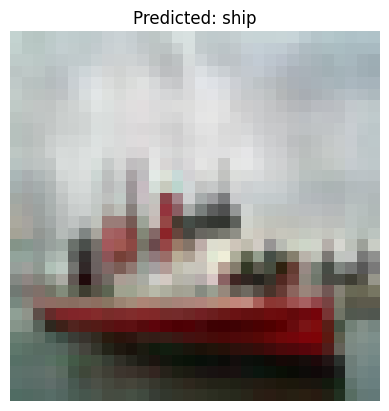

In [84]:
import matplotlib.pyplot as plt

# Load and display the image
img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_label}')
plt.axis('off')
plt.show()